In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from scipy import stats
from PIL import Image
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter

# Generate color palette from the 'twilight' colormap
cmap2 = plt.colormaps['twilight']

colors1 = []
for i in range(cmap2.N):
    rgb = cmap2(i / (cmap2.N - 1))[:4]  # Generate colors
    colors1.append(rgb2hex(rgb))
# Set Seaborn style
sns.set(style='whitegrid')


In [8]:
df = pd.read_csv('marketing_campaign.csv', low_memory=False, sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
#Find Missing Values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Fill missing data in the income column with mean
df.loc[df['Income'].isna(), 'Income'] = df['Income'].mean()
# Again Check for missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# Get unique values of Education Column
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
# Get unique values of Marital Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
#Get the response column unique values 
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
df.Response.unique()

array([1, 0], dtype=int64)

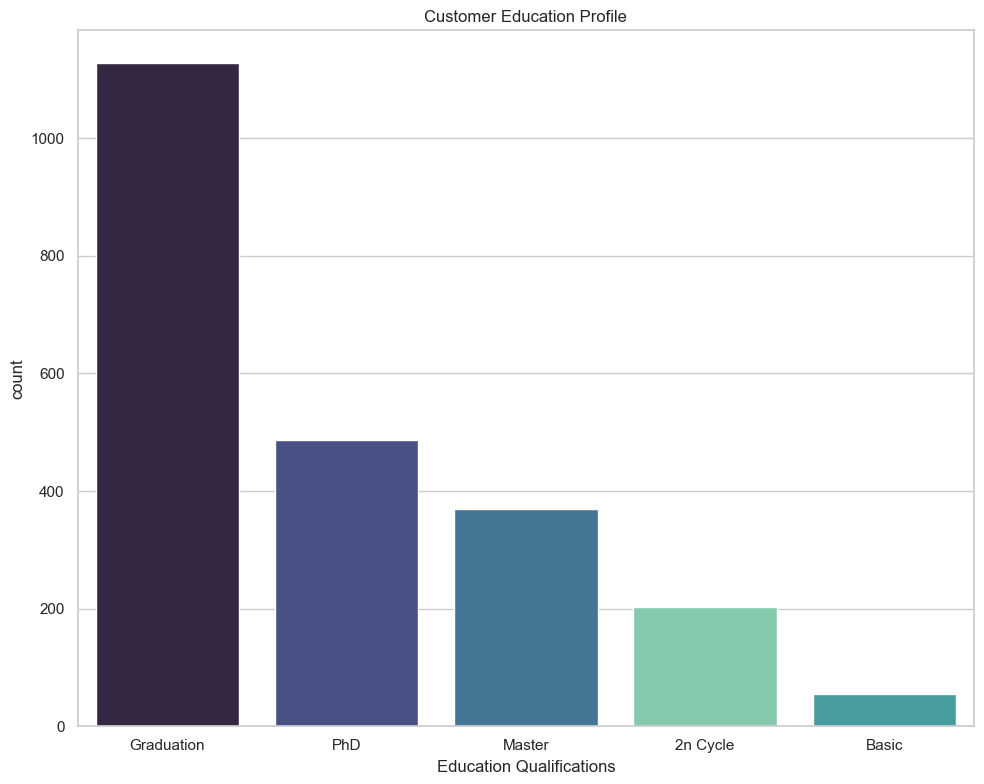

In [13]:
# Visualize Customer Education Profile
plt.figure(figsize = (10,8))
sns.countplot(x='Education',data=df,palette='mako',hue='Education', order = df['Education'].value_counts().index)
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

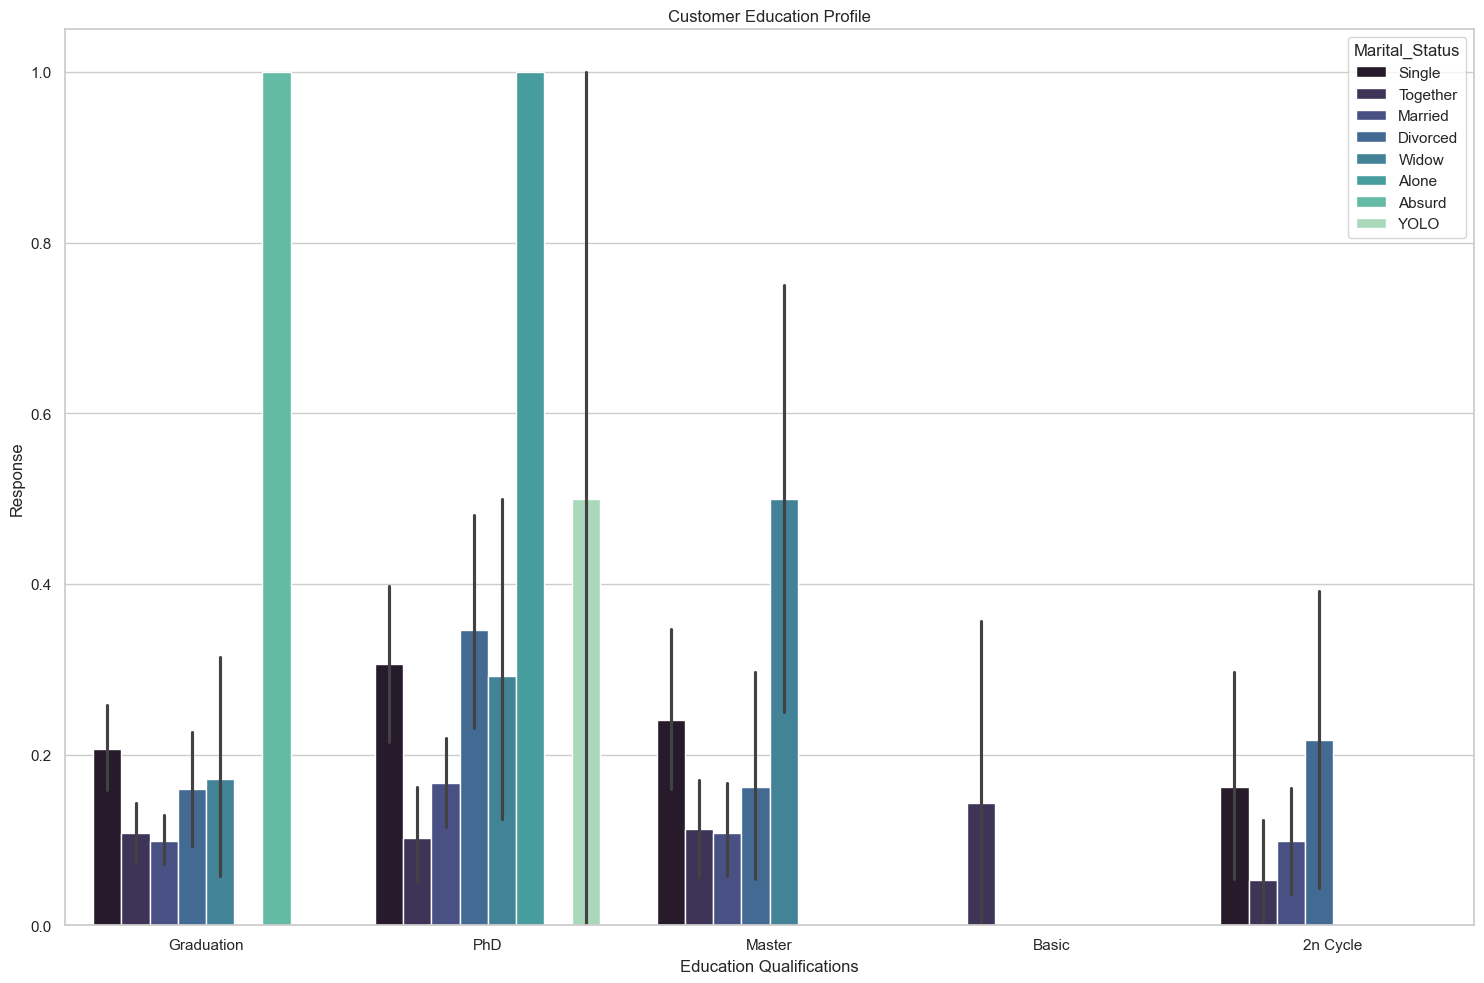

In [11]:
# Customer's Education profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Education',y='Response', data=df,palette='mako', hue='Marital_Status')
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

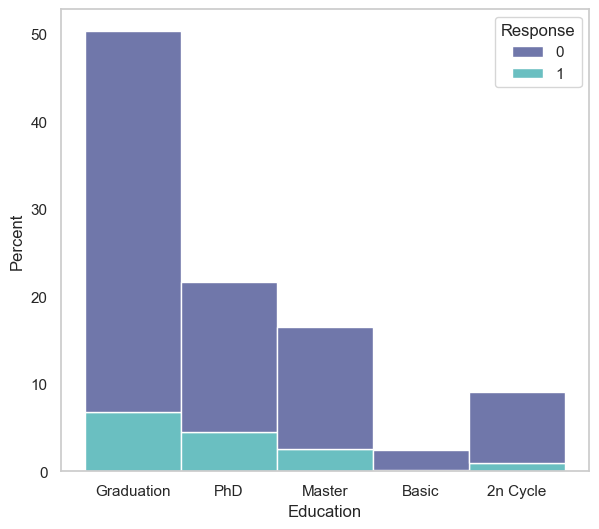

In [19]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the columns of interest
df.dropna(subset=['Education', 'Response'], inplace=True)

# Education & Response plot
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(x="Education", hue="Response", data=df, multiple="stack", stat="percent", palette='mako')

plt.grid(False)
plt.show()

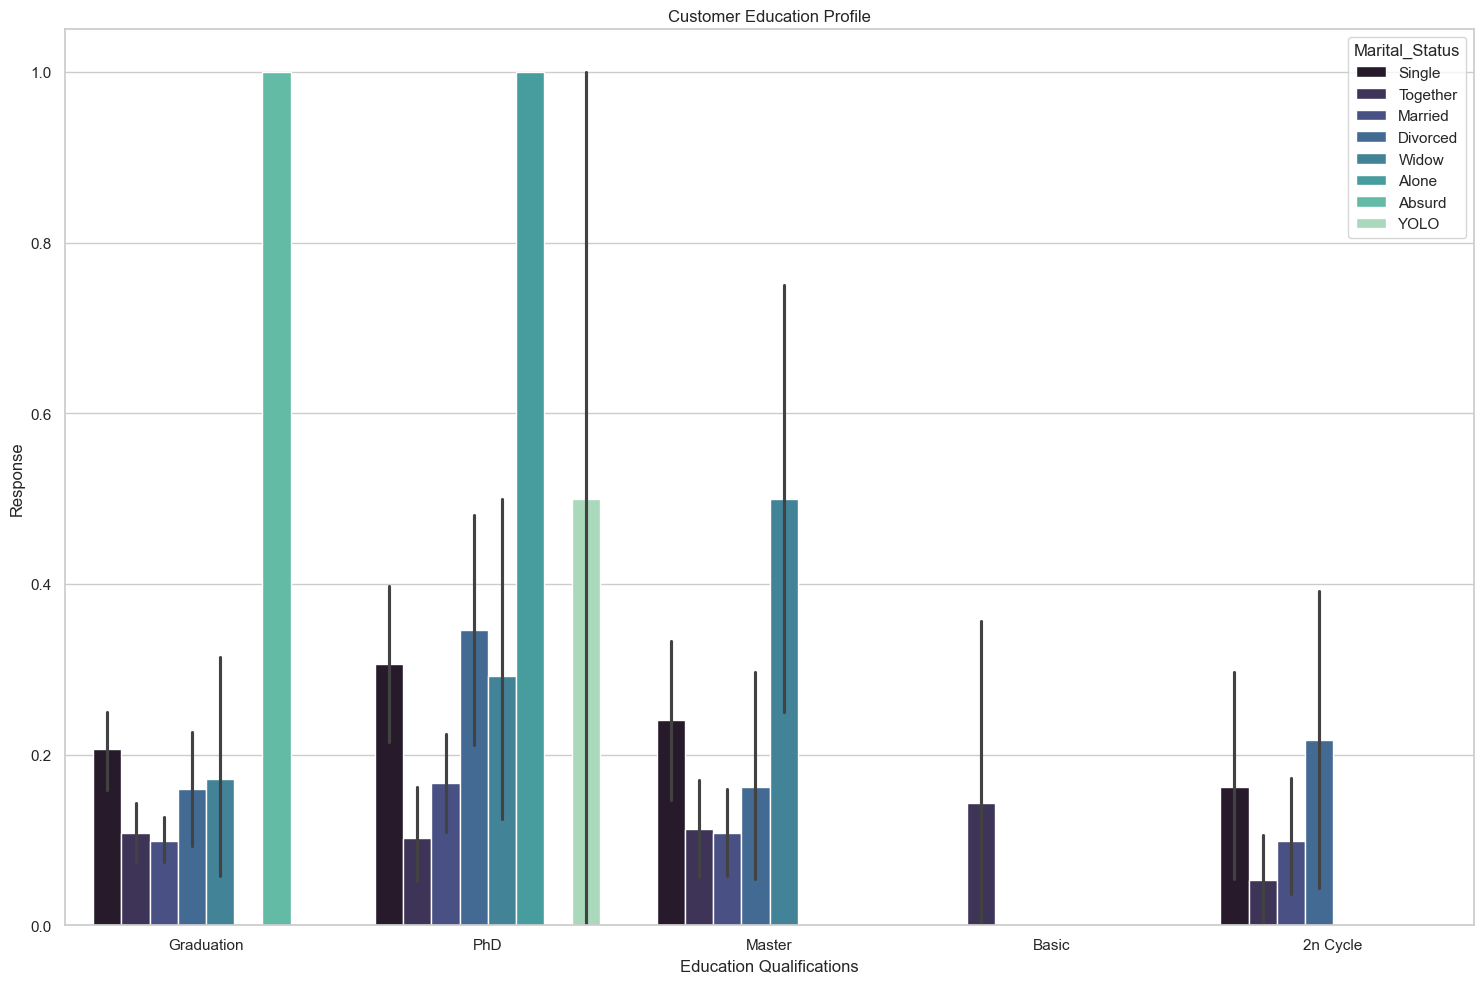

In [14]:
# Customer's Education profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Education',y='Response', data=df,palette='mako', hue='Marital_Status')
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

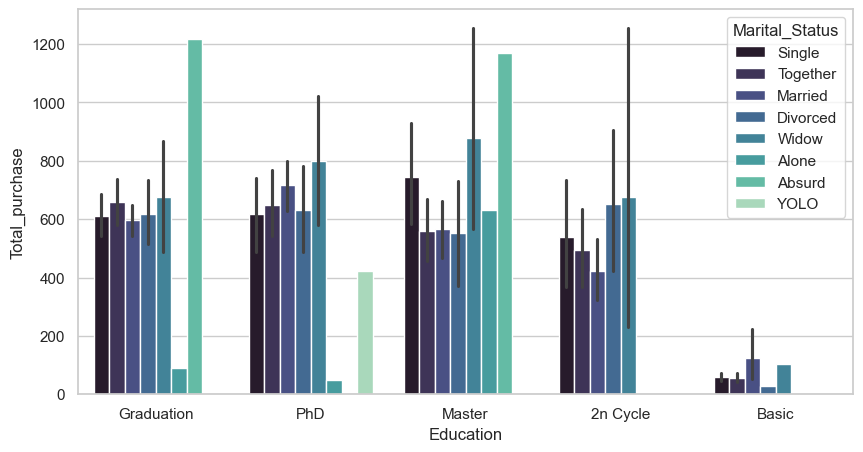

In [15]:
# Customer Age and Amount Spent on Product Purchases [ Who spent how much]
plt.figure(figsize=(10, 5),dpi=100)
df['Total_purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
#plt.subplot(1, 1, 1)
sns.barplot(x='Education',y='Total_purchase',data=df,palette='mako',order=df['Education'].value_counts().index,hue='Marital_Status')

plt.show()

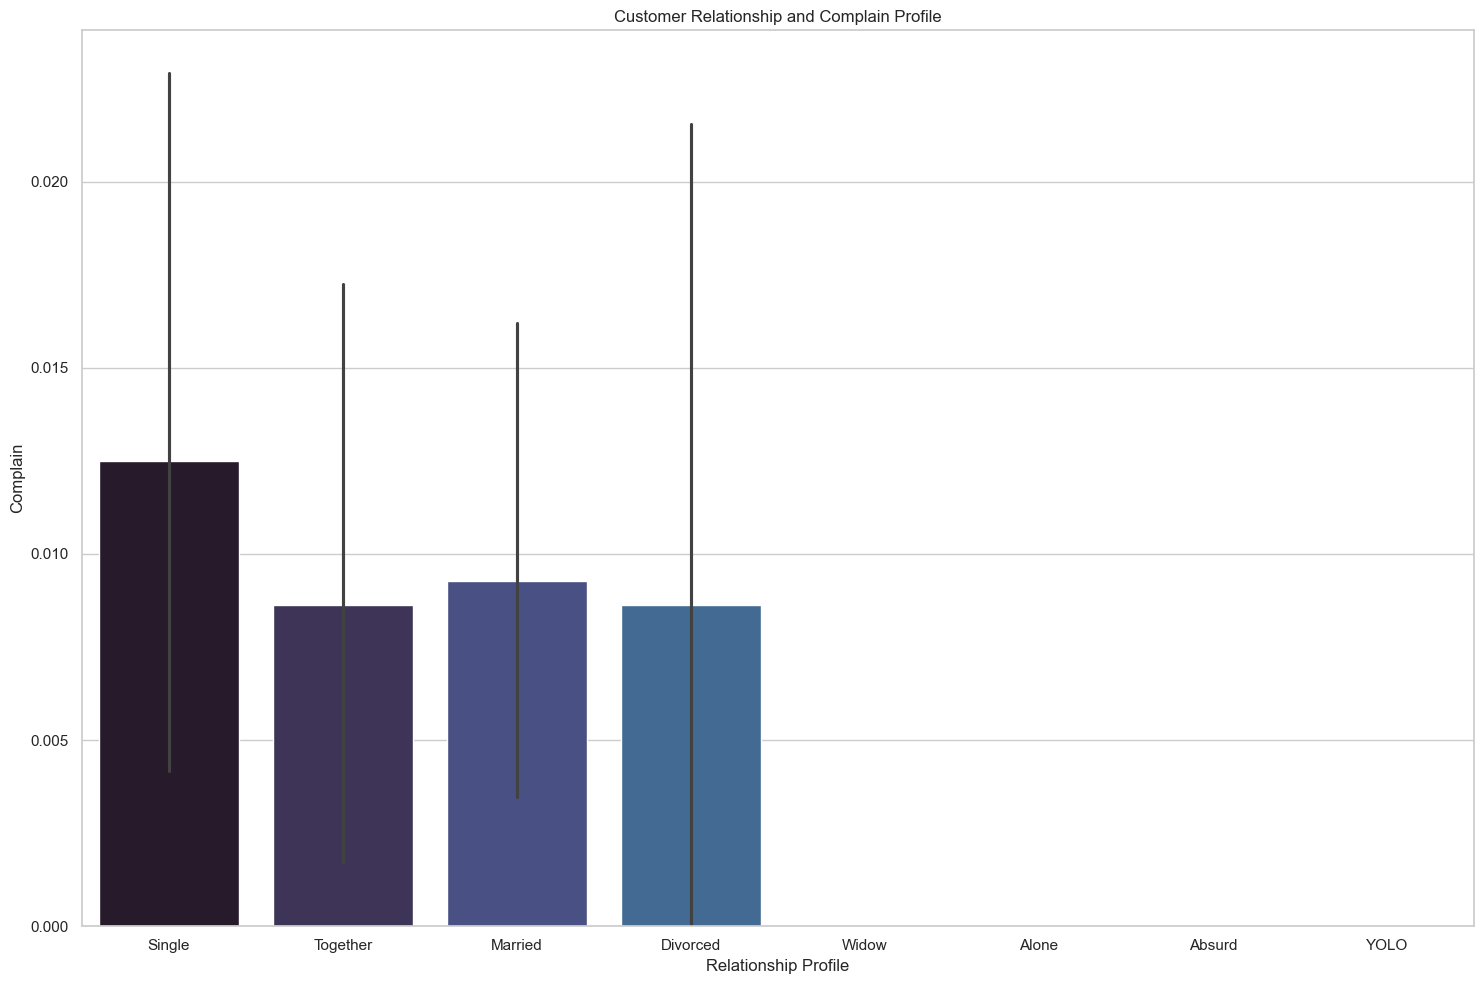

In [22]:
# Customer's Relationship profile and Complain
plt.figure(figsize = (15,10))
sns.barplot(x='Marital_Status',y='Complain', data=df,palette='mako',hue='Marital_Status')
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Complain Profile")
plt.tight_layout()

plt.show()

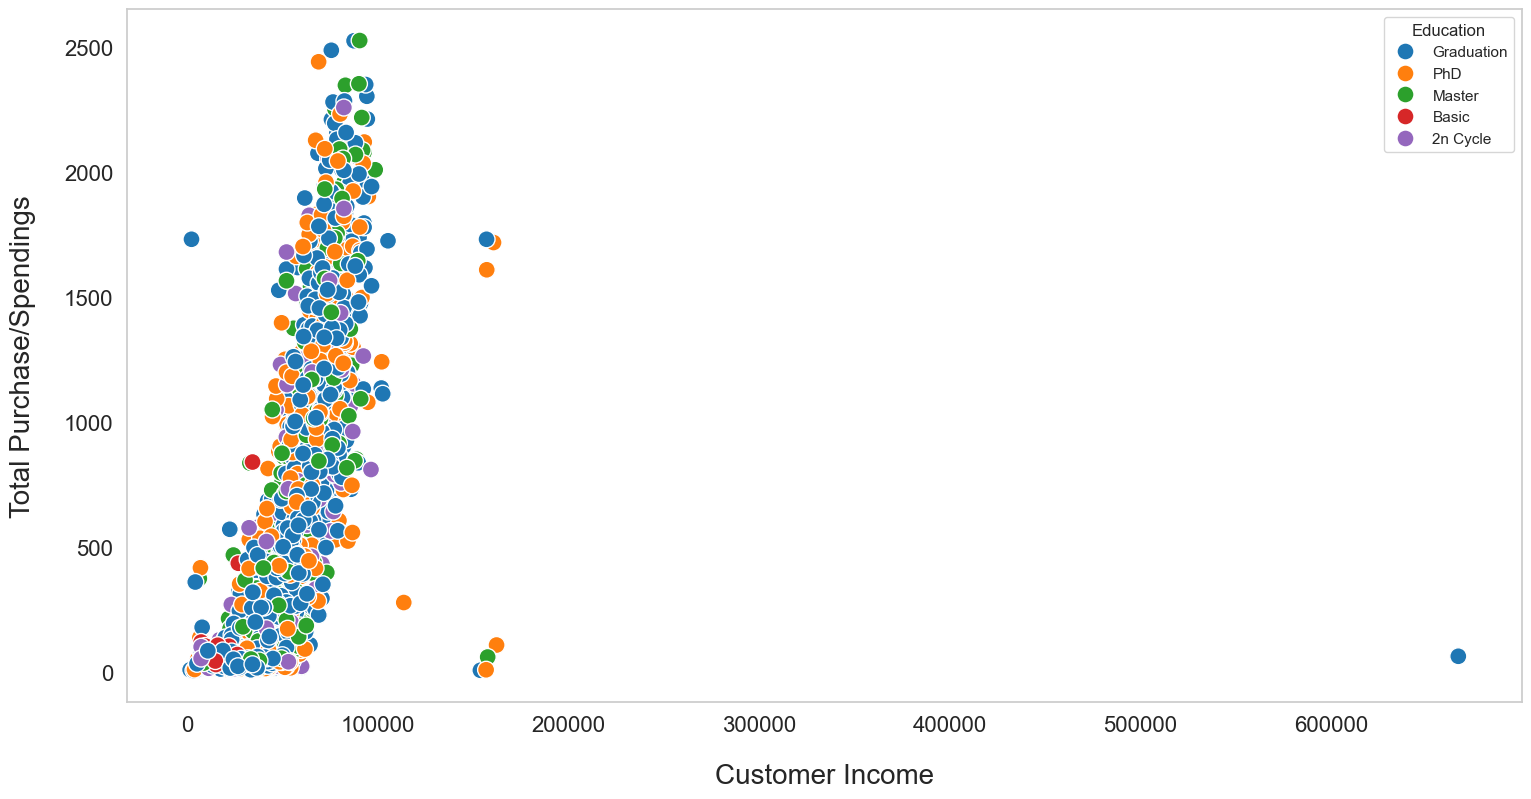

In [28]:
# Total Purchase/Spendings on diferent products by Income
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['Income'], y=df['Total_purchase'],hue=df['Education'], s=150,palette='tab10')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.grid(False)
plt.xlabel('Customer Income', fontsize=20, labelpad=20)
plt.ylabel('Total Purchase/Spendings', fontsize=20, labelpad=20)

plt.show()

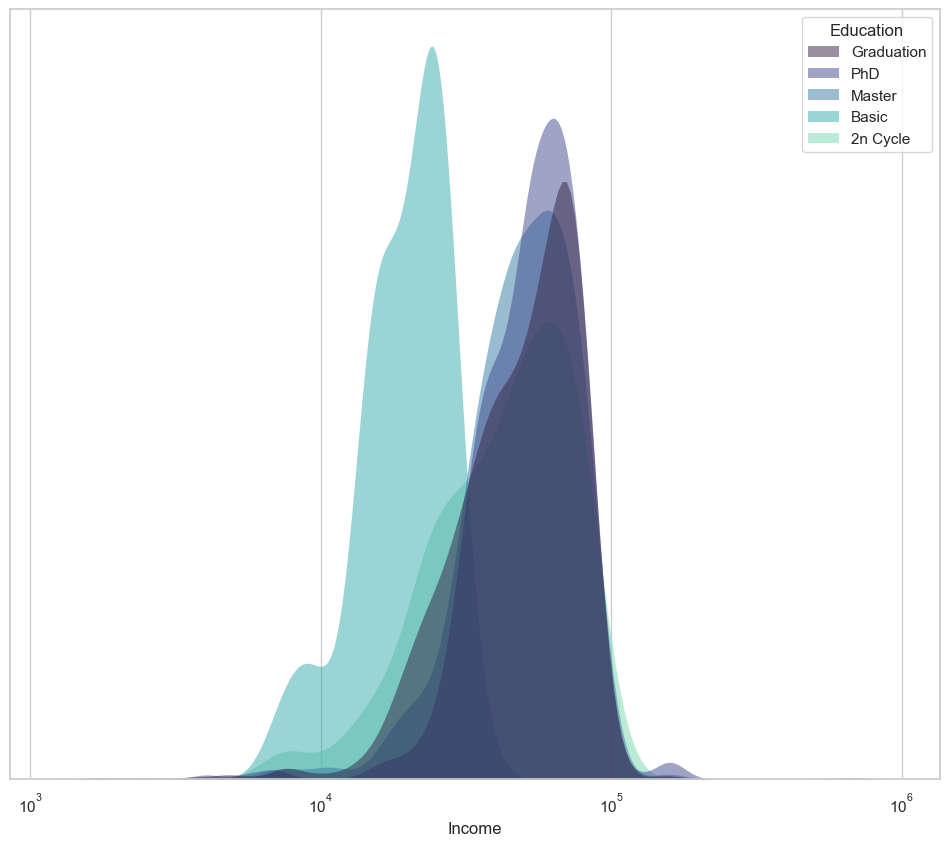

In [24]:
# Education and Income 
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

plt.show()

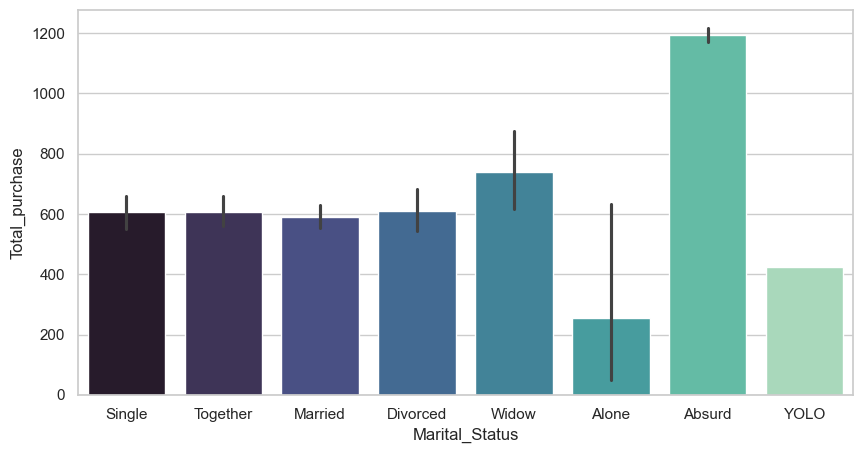

In [30]:
# Total Purchase by Marital Status
plt.figure(figsize=(10, 5),dpi=100)
sns.barplot(x='Marital_Status',y='Total_purchase',data=df,palette='mako', hue='Marital_Status')

plt.show()

In [31]:
# Total places from where purchases have been made
df['Total_place_purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] + df['NumWebVisitsMonth']

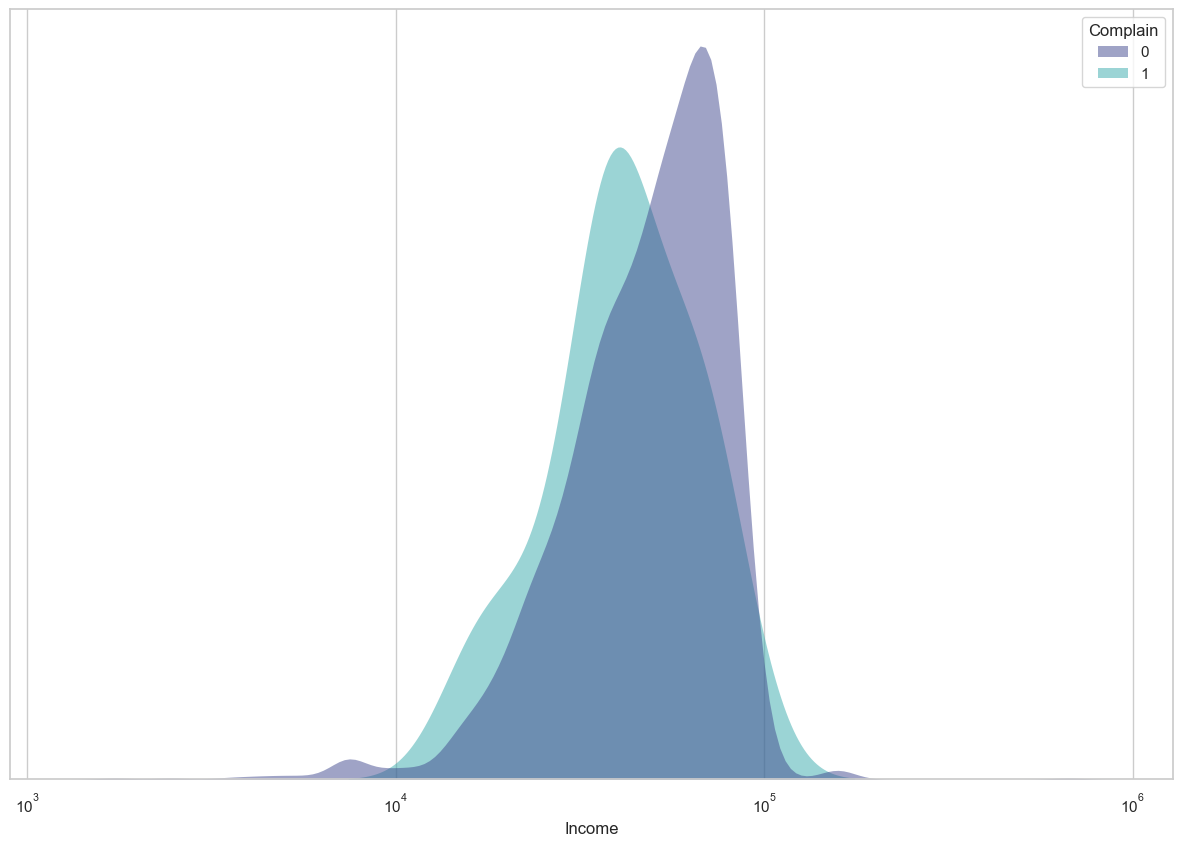

In [26]:
# Complaint Plot
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()

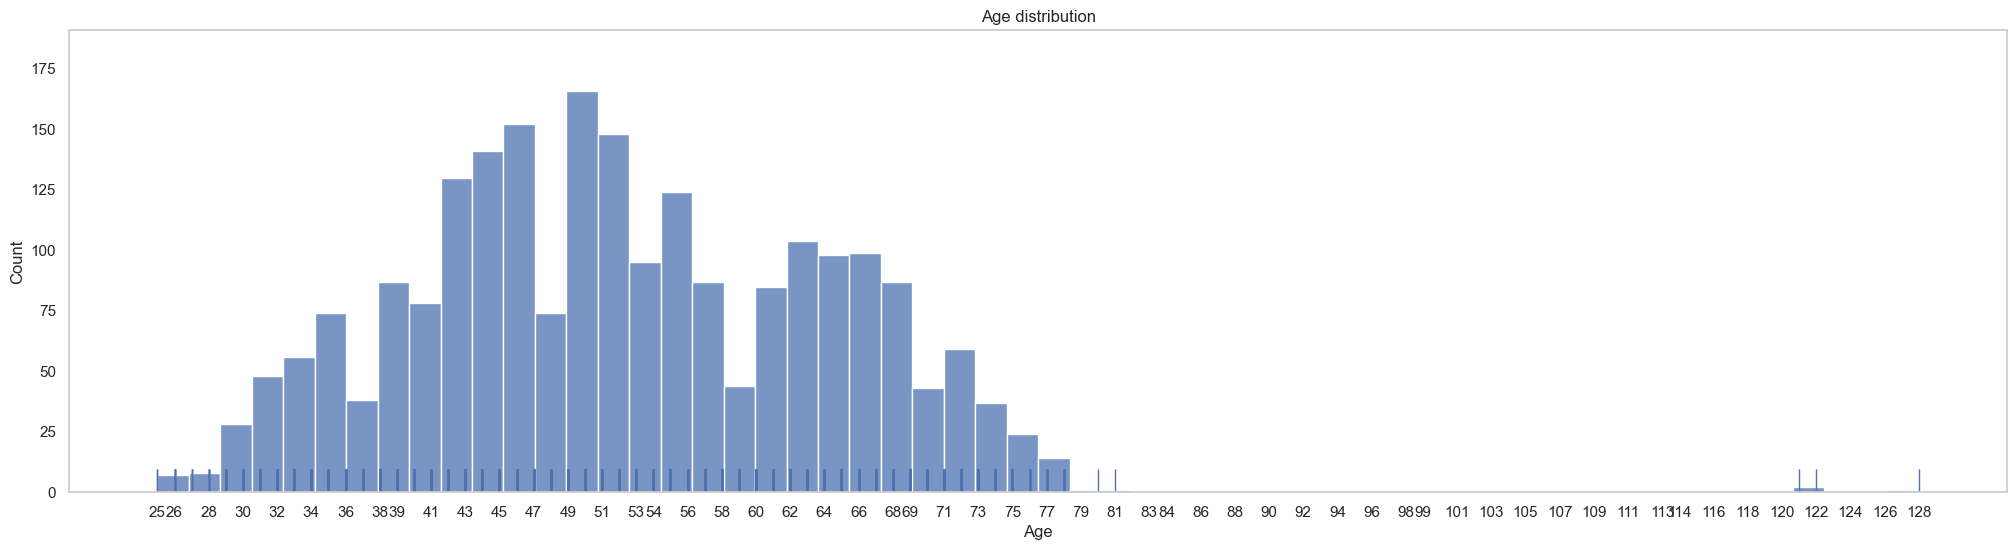

In [27]:
import datetime as dt
df['Age'] = 2021 - df.Year_Birth
# Age Level
plt.figure(figsize=(25, 6))
plt.title('Age distribution')
ax = sns.histplot(df['Age'].sort_values(), bins=56)
sns.rugplot(data=df['Age'], height=.05)
plt.xticks(np.linspace(df['Age'].min(), df['Age'].max(), 56, dtype=int, endpoint = True))
plt.grid(False)
plt.show()

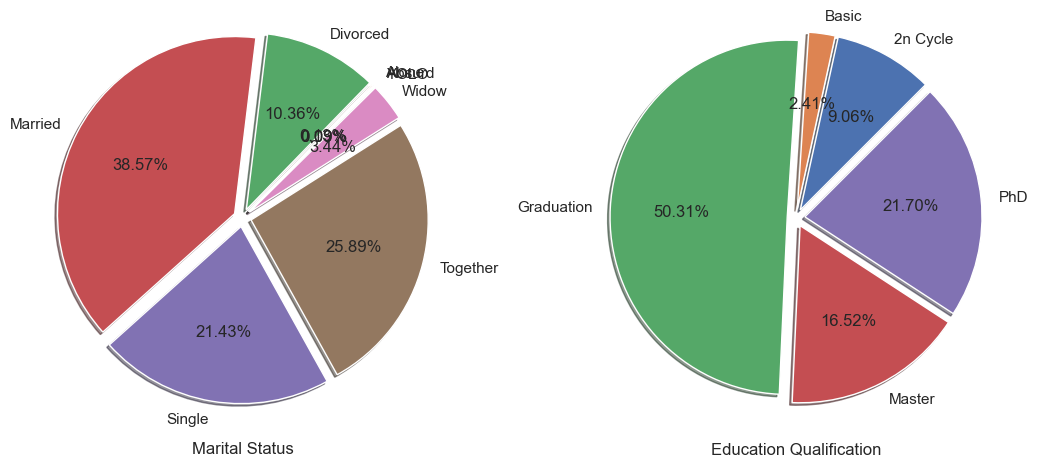

In [37]:
# Education and Marital Status
cc = df.groupby("Marital_Status").count()['ID']  # Use 'ID' column to count
label = df.groupby('Marital_Status').count()['ID'].index
fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].pie(cc, labels=label, shadow=True, autopct='%1.2f%%', explode=[0.1 for i in cc.index], radius=2, startangle=45)
ax[0].set_title('Marital Status', y=-0.6)

cc1 = df.groupby("Education").count()['ID']  # Use 'ID' column to count
label = df.groupby('Education').count()['ID'].index
ax[1].pie(cc1, labels=label, shadow=True, autopct='%1.2f%%', explode=[0.1 for i in cc1.index], radius=2, startangle=45)
ax[1].set_title('Education Qualification', y=-0.6)

plt.subplots_adjust(wspace=1.5, hspace=0)
plt.show()

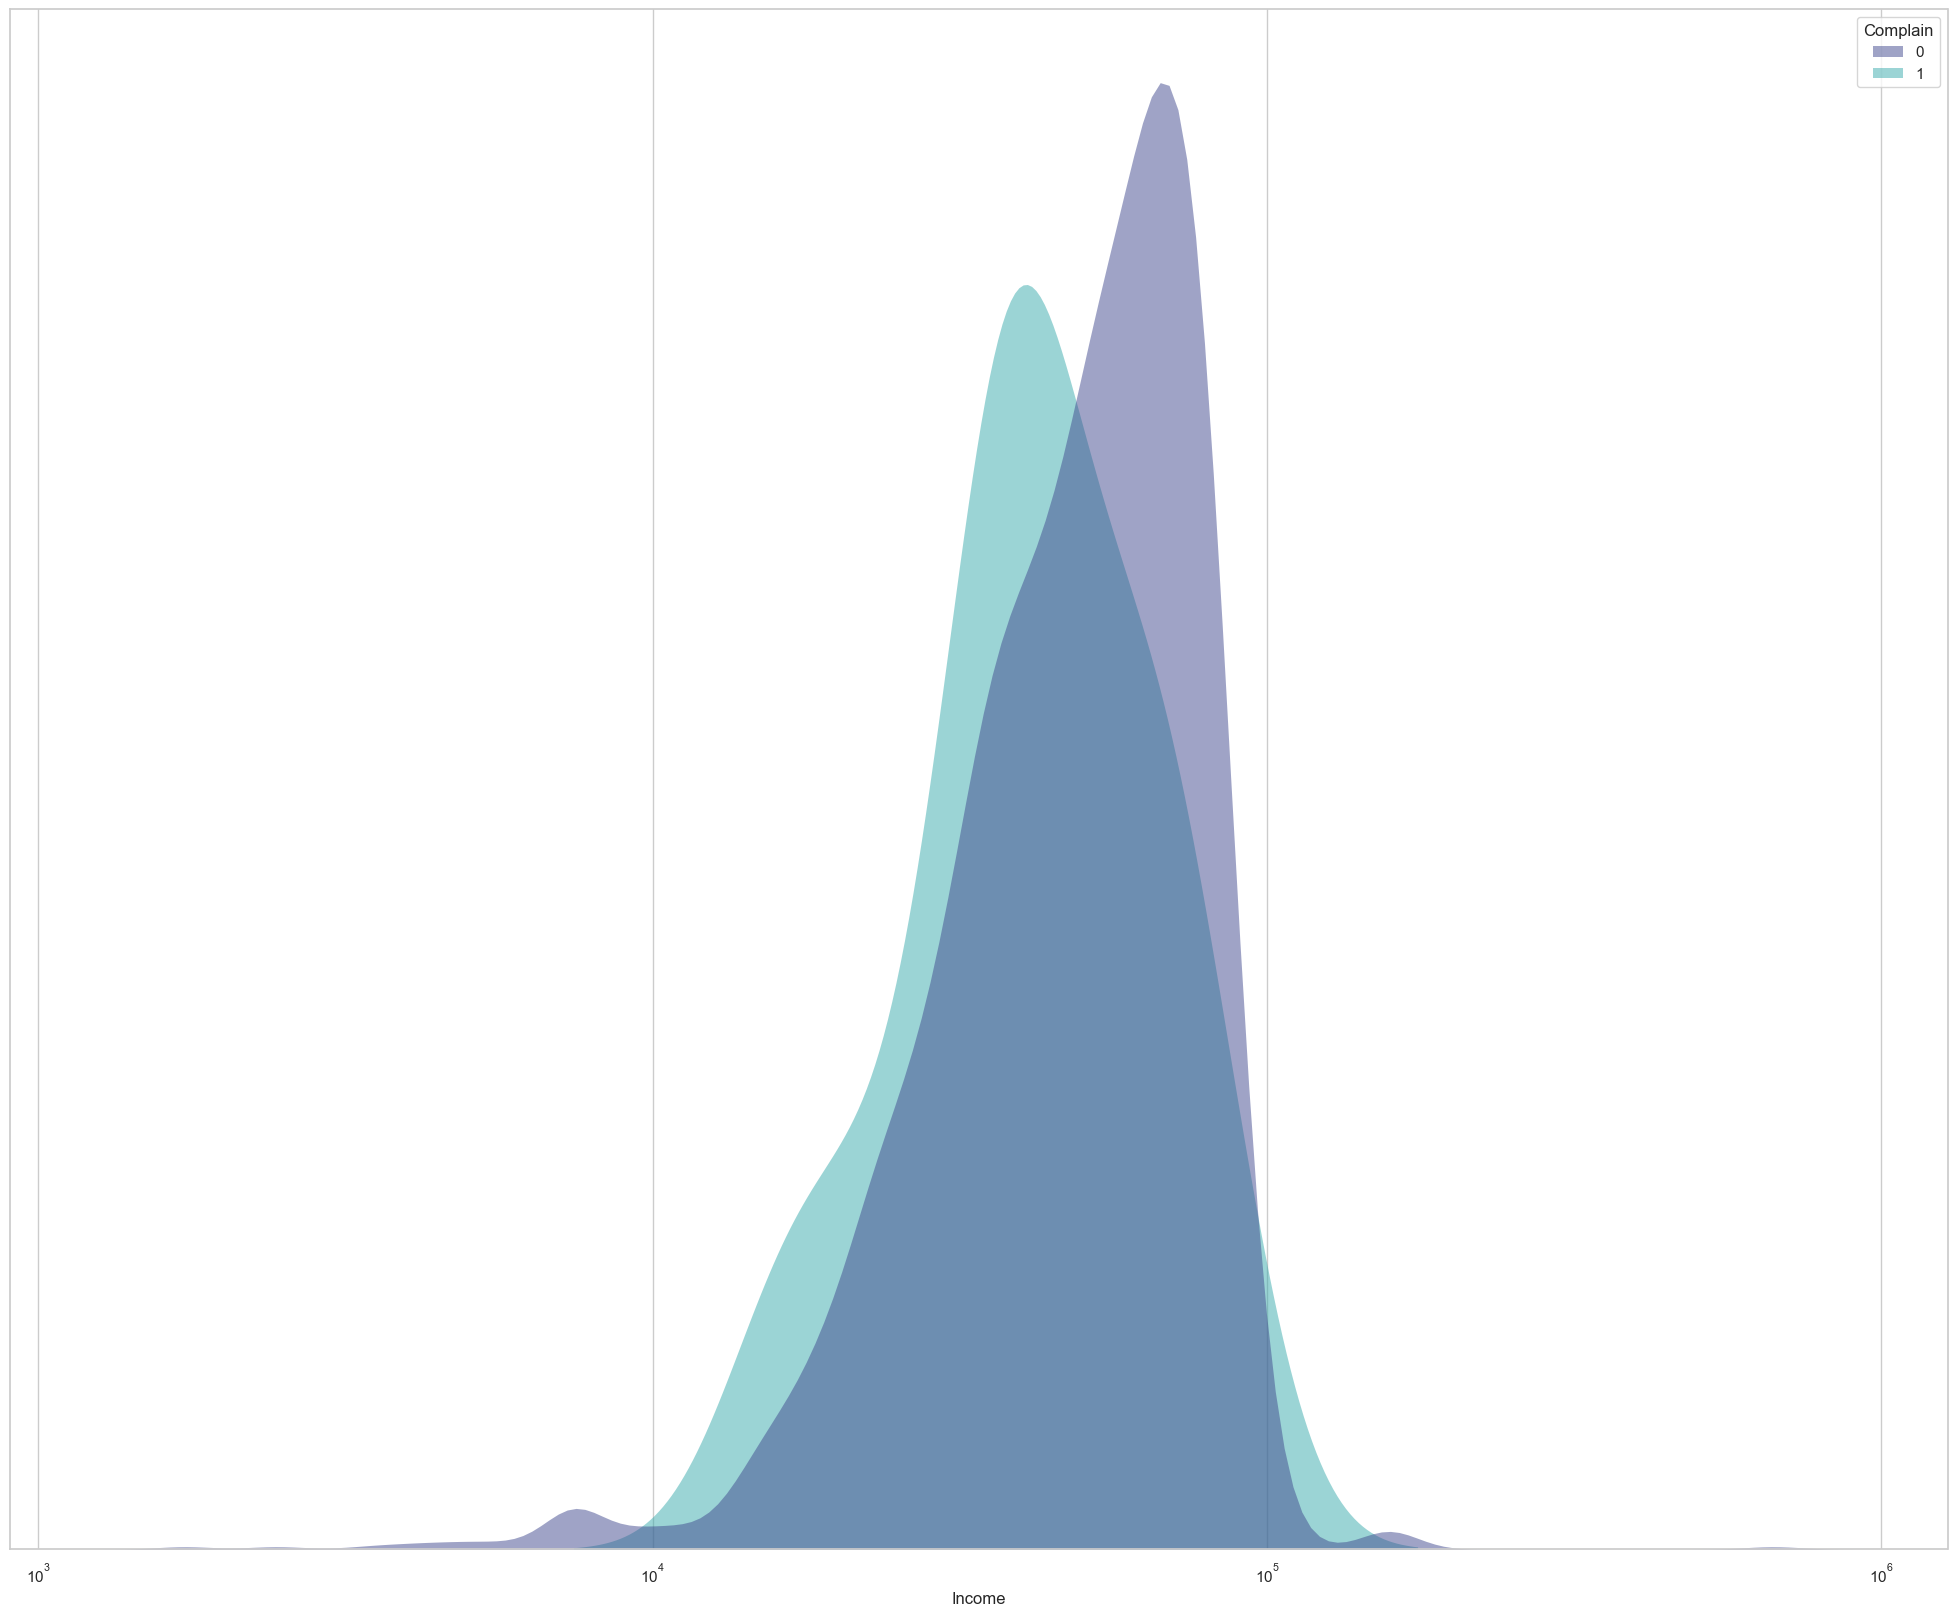

In [29]:
plt.figure(figsize=(25,20))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

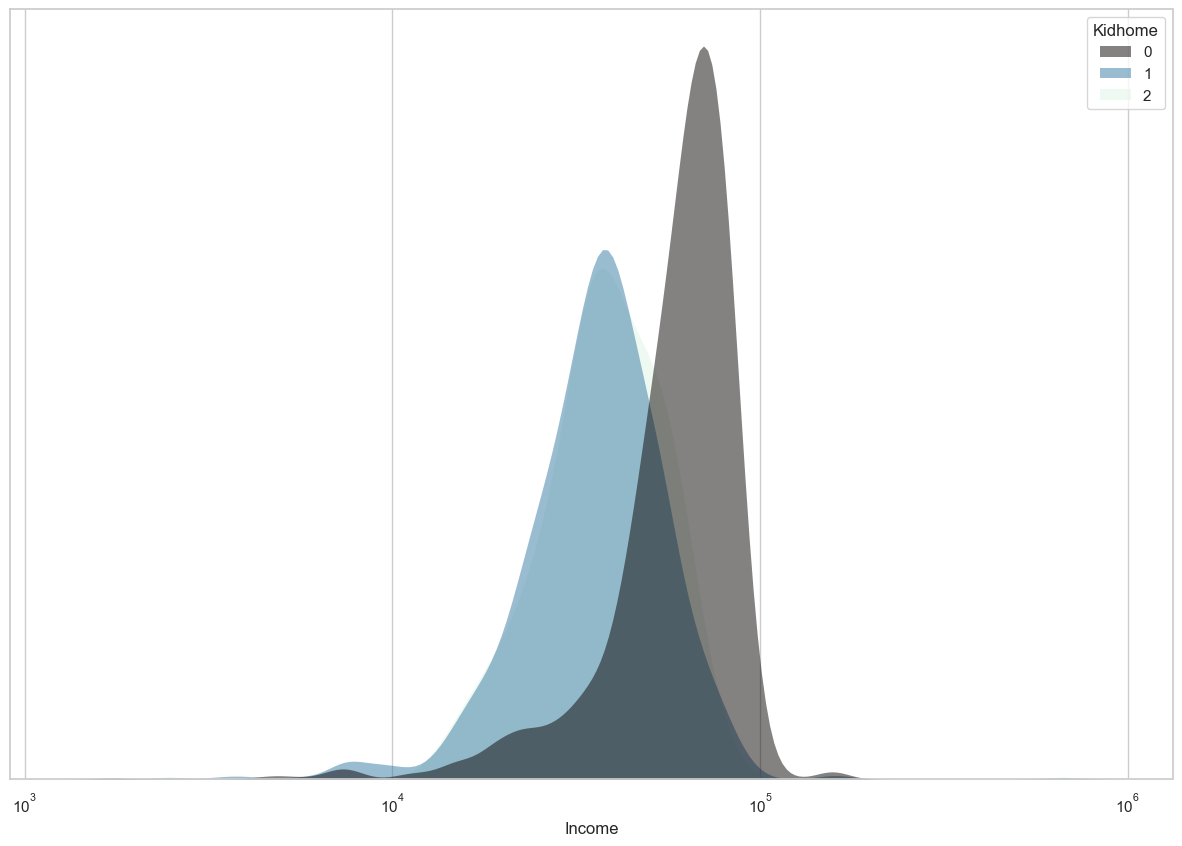

In [30]:
# No of Kids home vs Income
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()

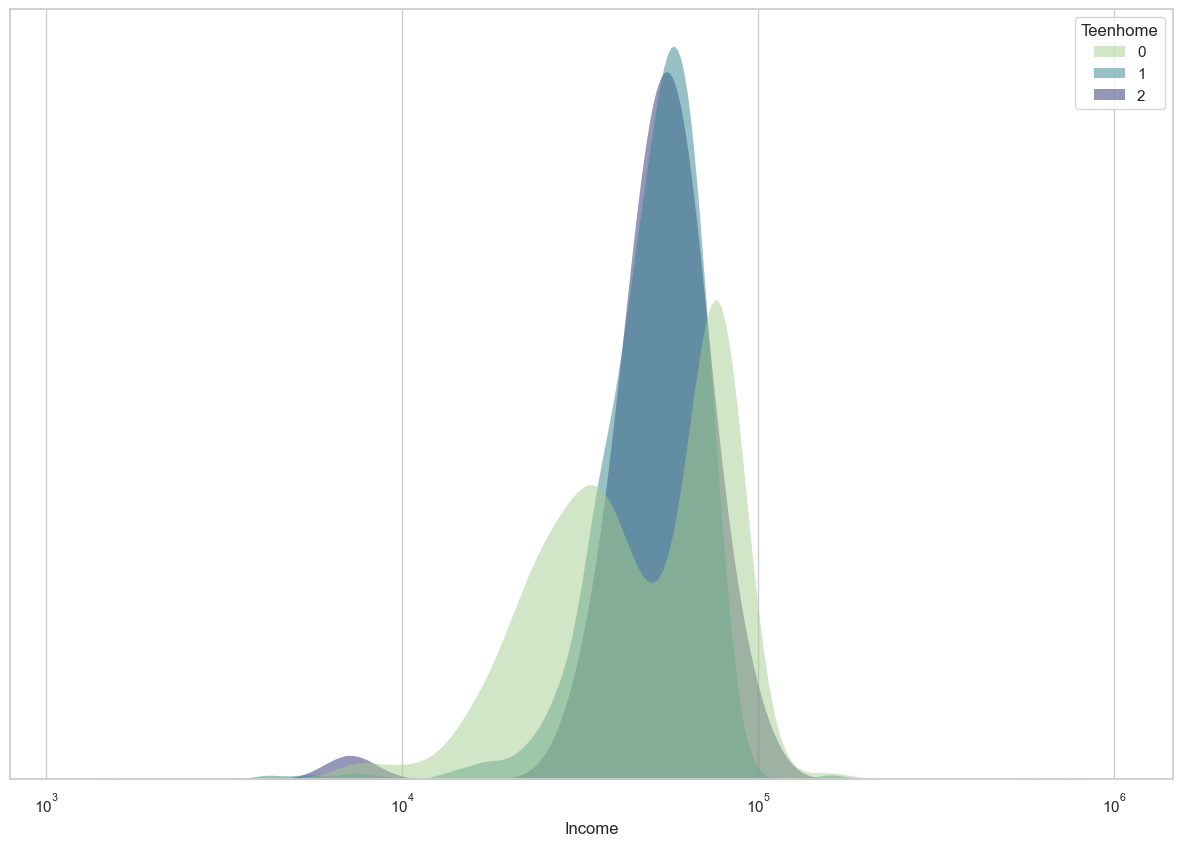

In [31]:
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Teenhome", log_scale= True,
   fill=True, common_norm=False,palette='crest',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

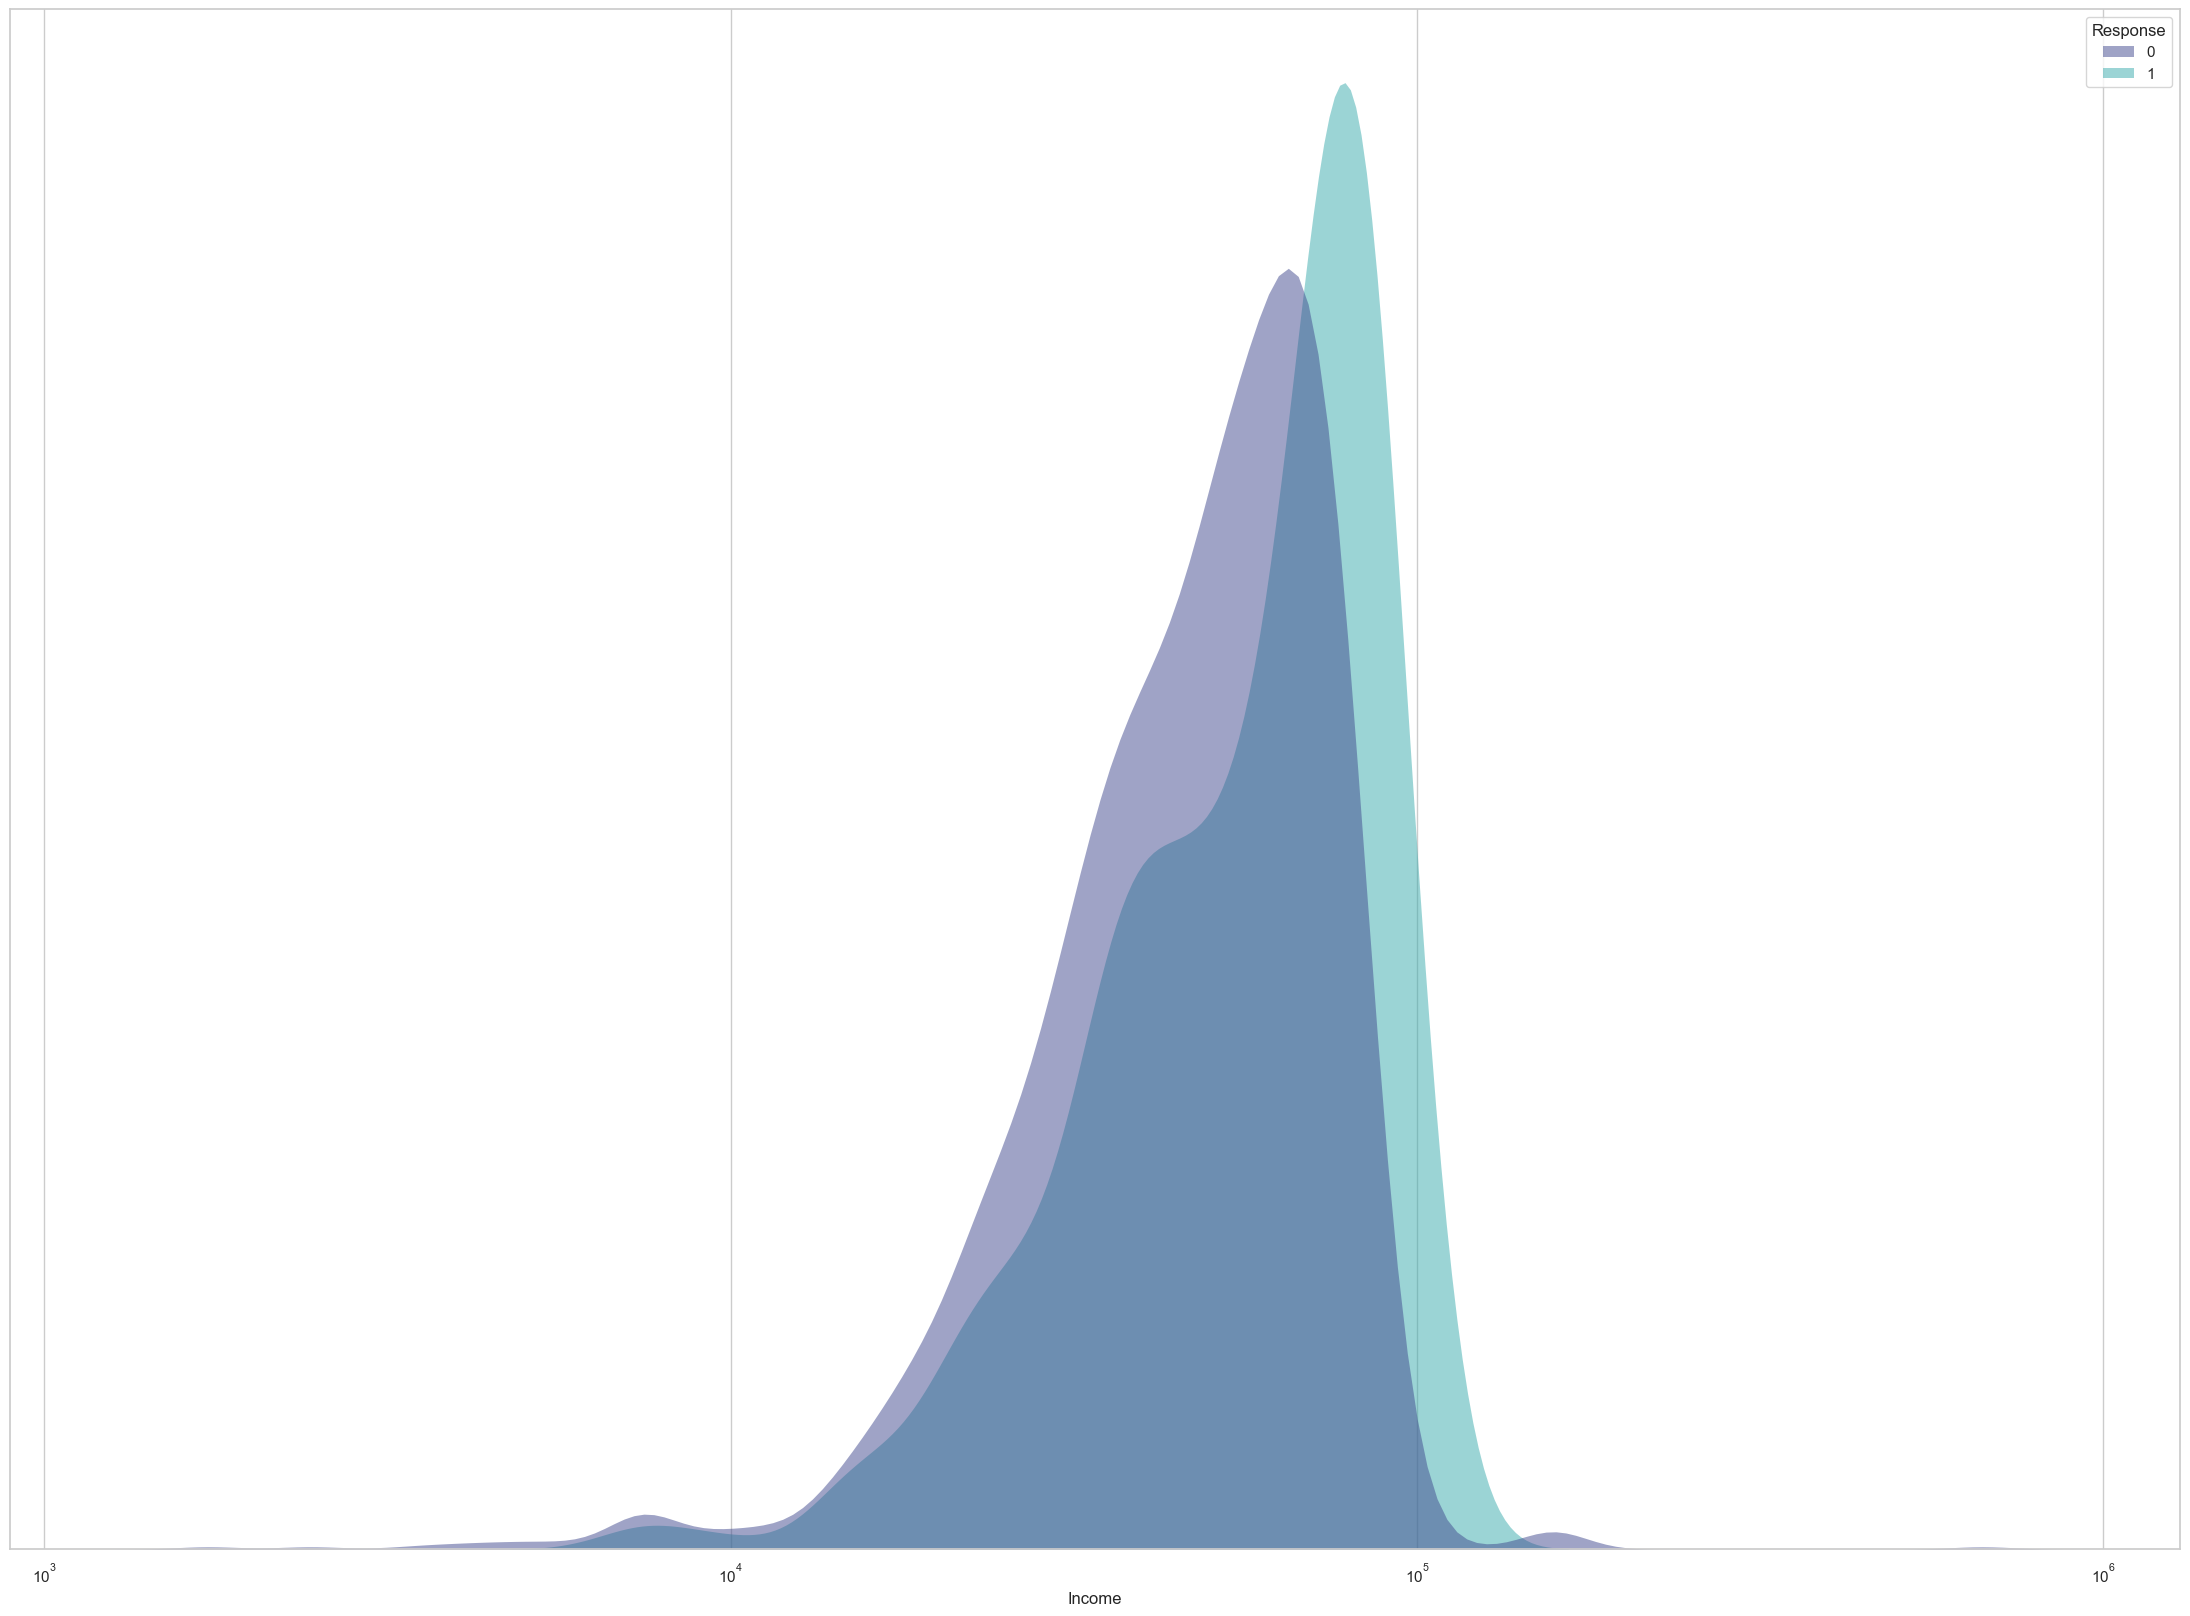

In [32]:
# Income and Response
plt.figure(figsize=(28,20))
sns.kdeplot(
   data=df, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Income')

plt.show()

In [49]:
#Z_Revenue & Z_CostContact have Constant value, which don’t provide any information so we should drop them.
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

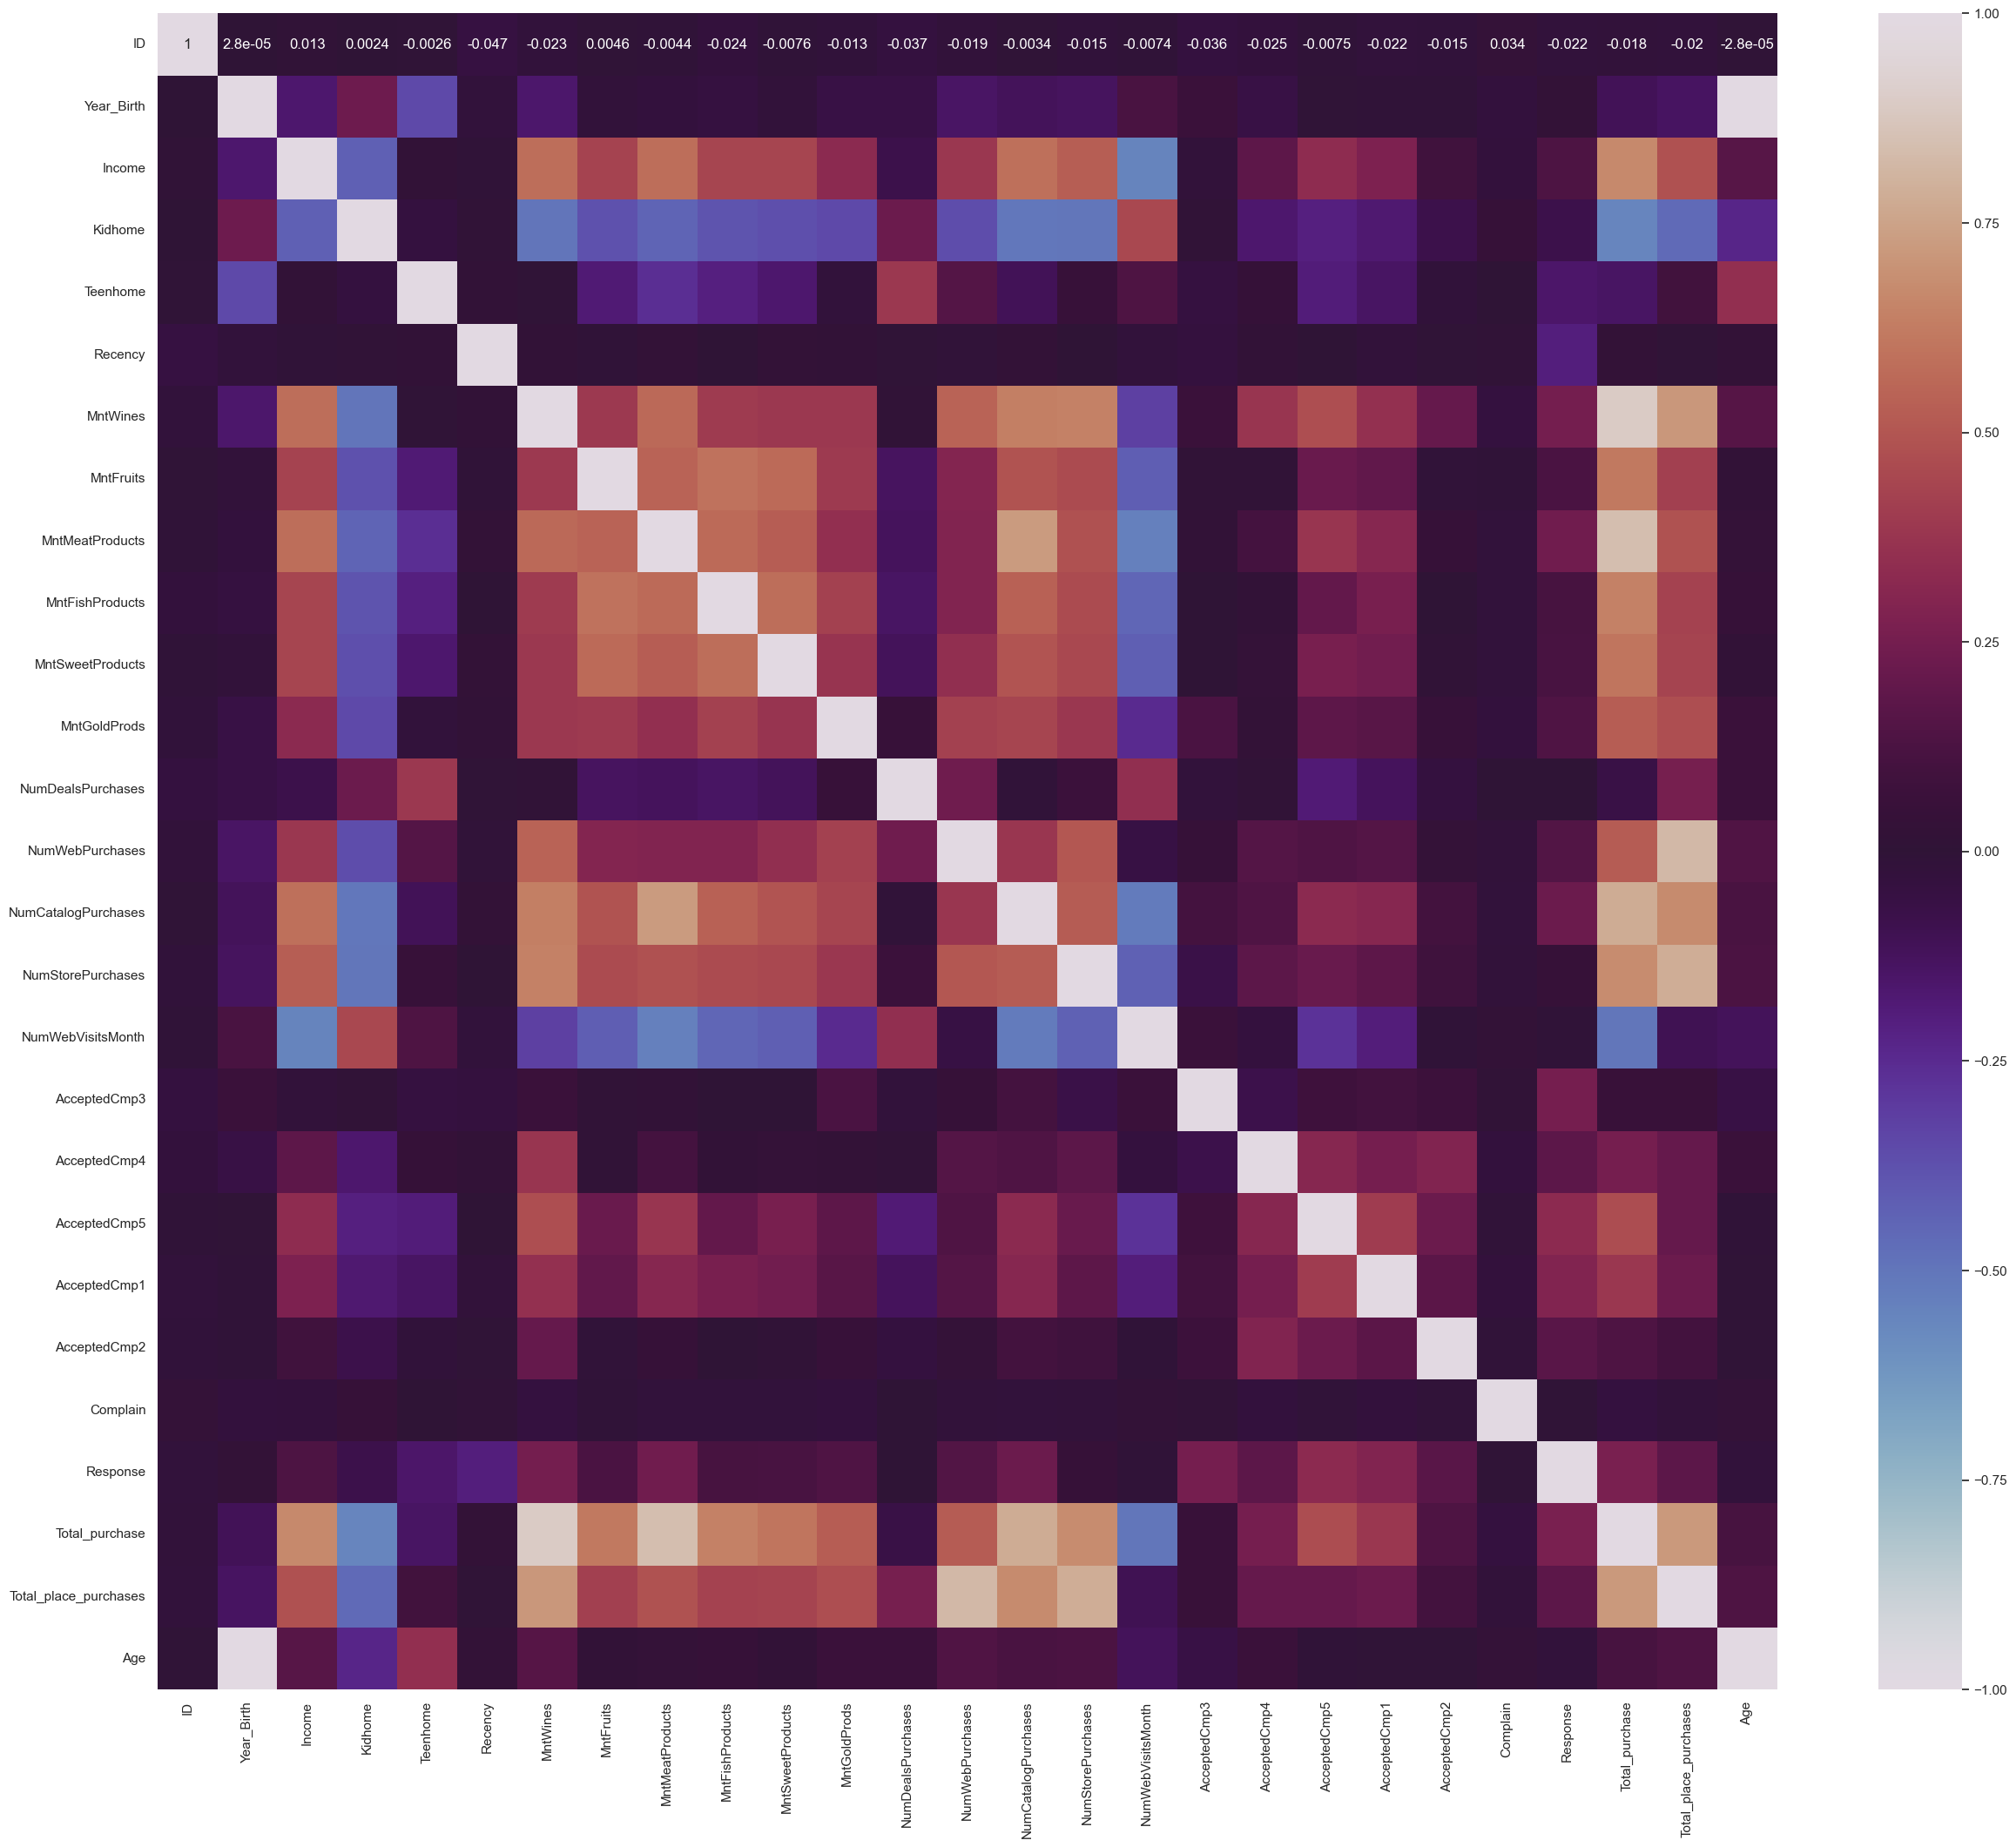

In [51]:
#To make a code, you have to 1. Filter Numeric columns, 2. Calculate the Correlation matrix, 3. Use seaborn to plot the heatmap. Therefore we do the following:-
# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
df_cor = numeric_df.corr()

# Generate colors for the heatmap
cmap2 = plt.colormaps['twilight']
colors1 = []
for i in range(cmap2.N):
    rgb = cmap2(i / (cmap2.N - 1))[:4]  # Generate colors
    colors1.append(rgb2hex(rgb))

# Plot the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df_cor, annot=True, cmap=colors1)

plt.show()

In [39]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_purchase', 'Total_place_purchases', 'Total_child', 'Camp_total'],
      dtype='object')


In [38]:
# Grouping Education 
df['Education']=df['Education'].str.replace('Graduation','Higher Education')
df['Education']=df['Education'].str.replace('PhD','Higher Education')
df['Education']=df['Education'].str.replace('Master','Higher Education')
df['Education']=df['Education'].str.replace('2n Cycle','Higher Education')
# Goruping Marital Status
df['Marital_Status']=df['Marital_Status'].str.replace('Married','In A Relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Together','In A Relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Alone','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Absurd','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('YOLO','Single')
# Grouping Kids
df['Total_child']=df['Kidhome'] +df['Teenhome']
# Campaign
df['Camp_total']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3'] +df['AcceptedCmp4']+df['AcceptedCmp5'] +df['Response']

In [40]:
# Removing Outliers
df=df.loc[np.abs(stats.zscore(df['Income']))<3]
df.reset_index(inplace=True)
df=df.drop(columns=['index'])  
df.shape

(2232, 33)

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Remove unnecessary columns and choose necessary ones
cols = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
        'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Total_purchase']
c_df = df[cols].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Label Encoding the Data (Education and Marital Status Column)
l = LabelEncoder()
c_df['Education'] = l.fit_transform(c_df['Education'])
c_df['Marital_Status'] = l.fit_transform(c_df['Marital_Status'])

# Standard Scaling
ss = StandardScaler()
c_df_final = ss.fit_transform(c_df)

# Convert the scaled data back to a DataFrame (optional, for better readability)
c_df_final = pd.DataFrame(c_df_final, columns=cols)

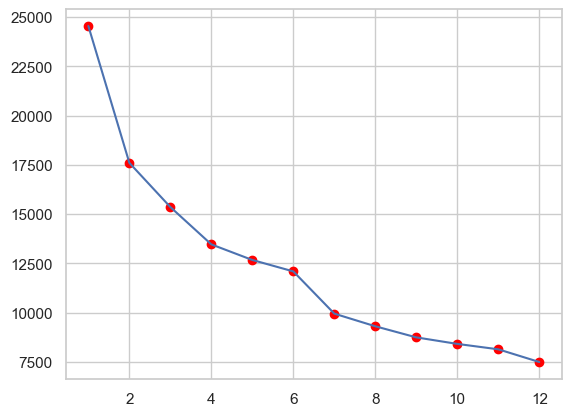

In [45]:
# Optimum no of Clusters
l1=[]
for i in range(1,13):
    k_mean=KMeans(n_clusters=i,random_state=42,init="k-means++")
    k_mean.fit(c_df_final)
    l1.append(k_mean.inertia_)
plt.plot(range(1,13),l1)
plt.scatter(range(1,13),l1,color="red")

plt.show()

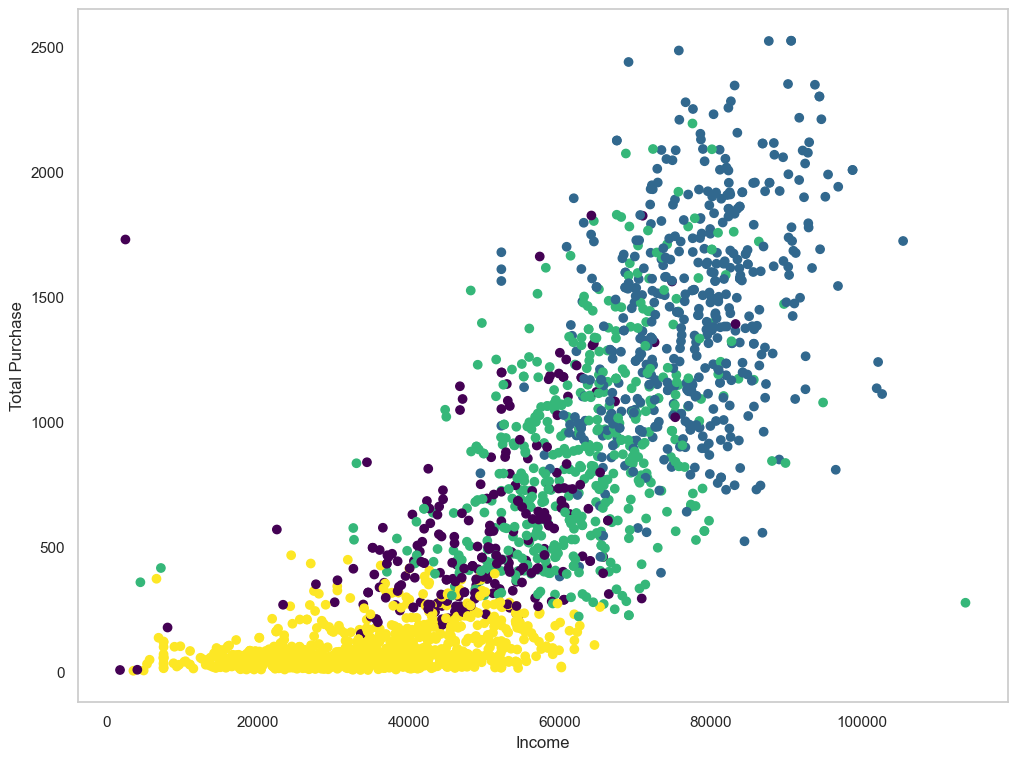

In [48]:
# Kmeans ( 4 Clusters )
km=KMeans(n_clusters=4,random_state=0,init="k-means++")
km.fit(c_df_final)
clusters=km.predict(c_df_final)
c_df['cluster_no'] = clusters
#plot
plt.figure(figsize=(12,9))
plt.scatter(df['Income'],df['Total_purchase'],c=clusters, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.grid(False)

plt.show()

In [49]:
c_df['cluster_no'].value_counts()

cluster_no
3    1001
2     498
1     489
0     244
Name: count, dtype: int64

In [50]:

print("Cluster 0 Total Spending: ", c_df.loc[c_df['cluster_no']== 0 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 1 Total Spending: ",c_df.loc[c_df['cluster_no']== 1 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 2 Total Spending: ",c_df.loc[c_df['cluster_no']== 2 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 3 Total Spending: ",c_df.loc[c_df['cluster_no']== 3 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 0 Income: ",c_df.loc[c_df['cluster_no']== 0 ,['Income'] ].mean()['Income'])
print("Cluster 1 Income: ",c_df.loc[c_df['cluster_no']== 1 ,['Income'] ].mean()['Income'])
print("Cluster 2 Income: ",c_df.loc[c_df['cluster_no']== 2 ,['Income'] ].mean()['Income'])
print("Cluster 3 Income: ",c_df.loc[c_df['cluster_no']== 3 ,['Income'] ].mean()['Income'])

Cluster 0 Total Spending:  565.4467213114754
Cluster 1 Total Spending:  1408.2576687116564
Cluster 2 Total Spending:  869.8795180722891
Cluster 3 Total Spending:  91.79220779220779
Cluster 0 Income:  49602.13116973427
Cluster 1 Income:  77155.55420330299
Cluster 2 Income:  62492.6465972192
Cluster 3 Income:  34273.409606638845


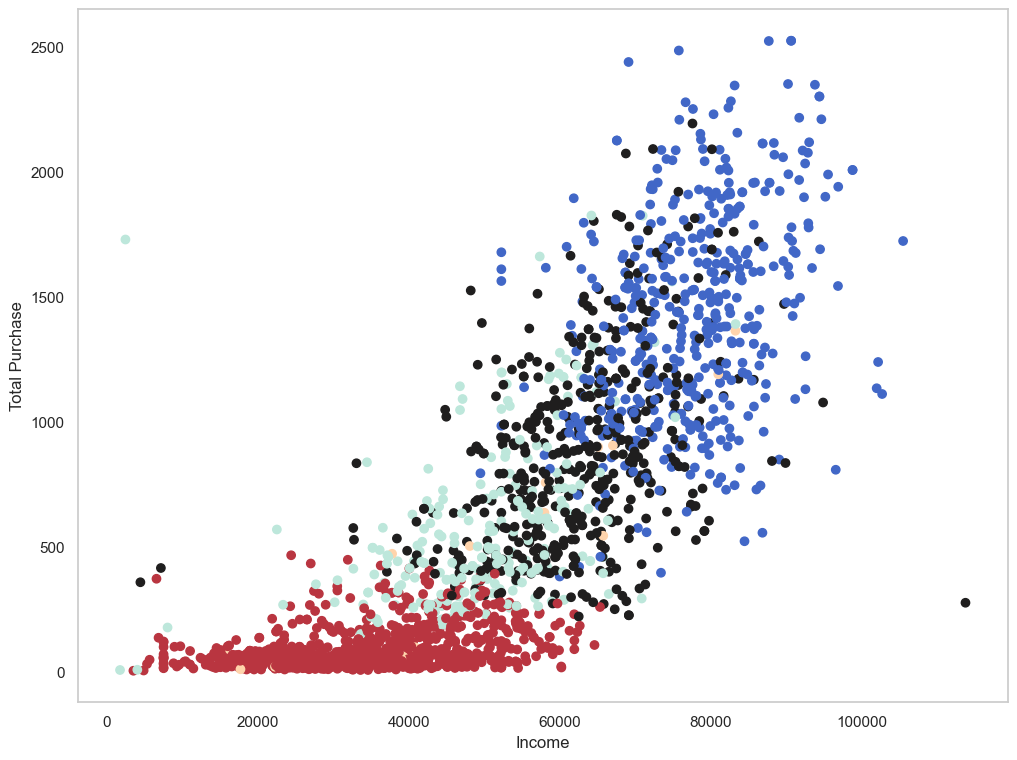

In [51]:
# Kmeans 5 clusters
km=KMeans(n_clusters=5,random_state=0,init="k-means++")
km.fit(c_df_final)
clusters=km.predict(c_df_final)
c_df['cluster_no'] = clusters
#plot
plt.figure(figsize=(12,9))
plt.scatter(df['Income'],df['Total_purchase'],c=clusters, cmap='icefire')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.grid(False)

plt.show()

In [52]:
c_df['cluster_no'].value_counts()

cluster_no
3    991
2    493
1    487
0    240
4     21
Name: count, dtype: int64

In [53]:
print("Cluster 0 Total Spending: ", c_df.loc[c_df['cluster_no']== 0 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 1 Total Spending: ",c_df.loc[c_df['cluster_no']== 1 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 2 Total Spending: ",c_df.loc[c_df['cluster_no']== 2 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 3 Total Spending: ",c_df.loc[c_df['cluster_no']== 3 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 4 Total Spending: ",c_df.loc[c_df['cluster_no']== 4 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 0 Income: ",c_df.loc[c_df['cluster_no']== 0 ,['Income'] ].mean()['Income'])
print("Cluster 1 Income: ",c_df.loc[c_df['cluster_no']== 1 ,['Income'] ].mean()['Income'])
print("Cluster 2 Income: ",c_df.loc[c_df['cluster_no']== 2 ,['Income'] ].mean()['Income'])
print("Cluster 3 Income: ",c_df.loc[c_df['cluster_no']== 3 ,['Income'] ].mean()['Income'])
print("Cluster 4 Income: ",c_df.loc[c_df['cluster_no']== 4 ,['Income'] ].mean()['Income'])

Cluster 0 Total Spending:  567.8083333333333
Cluster 1 Total Spending:  1412.5318275154004
Cluster 2 Total Spending:  867.6795131845842
Cluster 3 Total Spending:  92.67709384460142
Cluster 4 Total Spending:  376.42857142857144
Cluster 0 Income:  49717.80418922984
Cluster 1 Income:  77183.44970311123
Cluster 2 Income:  62462.064919706216
Cluster 3 Income:  34305.255314072136
Cluster 4 Income:  45242.28571428572
